<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rg = Ridge(alpha=0.12) # alpha가 커질수록 규제값이 작아진다
rg.fit(X_train, y_train)

Ridge(alpha=0.12)

In [ ]:
rg.score(X_test, y_test) # 회귀는 score를 쓰면 안된다

0.4109537743522047

In [ ]:
# 회귀 -> score을 쓰면 안된다 그렇다면? - 1. 상관계수
#                                         2. mean_squared_error

# 상관계수로 비교
# 실제 결과와 예측 결과를 비교
np.corrcoef(y_test, rg.predict(X_test))

array([[1.        , 0.64287567],
       [0.64287567, 1.        ]])

In [ ]:
# 왜 상관계수는 주식/돈 등 스케일이 큰 값에 쓰면 안될까?
# - 상관계수는 크기가 상관없기 때문
# ex) x 1  2  3 
#     y 10 20 30     -> 상관계수가 1
# ex) x 1    2    3
#     y 1000 2000 3000 -> 상관계수가 1
# 쓰는 사람이 있긴하지만 한계가 분명하다
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rg.predict(X_test))
mse

3831.9160388584683

In [ ]:
# 뭘 쓰든 정답은 없다.
mse/np.max(y_test) # 스케일링 - max normalization mse
mse/np.mean(y_test)
mse/(np.max(y_test)-np.min(y_test))

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dnn = Sequential()
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam') # 회귀때는 mse만 쓴다

In [ ]:
dnn.fit(X_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
17/17 [==============================] - 0s 5ms/step - loss: 2999.7747 - mean_absolute_error: 44.6765
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 2951.3904 - mean_absolute_error: 44.4067
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 2927.9548 - mean_absolute_error: 44.0185
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 2911.7678 - mean_absolute_error: 43.9842
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 2932.6943 - mean_absolute_error: 43.9500
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 2955.0137 - mean_absolute_error: 44.3340
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 2922.9932 - mean_absolute_error: 43.8530
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 2920.1995 - mean_absolute_error: 43.4413
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 2887.2961 - mean_absolut

In [ ]:
dnn.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2946.0042 - mean_absolute_error: 43.0385


[2946.004150390625, 43.0384635925293]

In [ ]:
# 상관계수, mse
np.corrcoef(np.array(y_test), dnn.predict(X_test).T) # 각 데이터 셋을 직접 펼쳐보고 어레이를 맞춰줘야 한다

array([[1.        , 0.70298525],
       [0.70298525, 1.        ]])

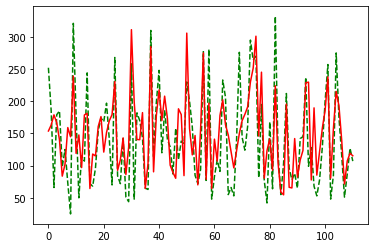

In [ ]:
plt.plot(range(len(X_test)), y_test, 'g--')
plt.plot(range(len(X_test)), dnn.predict(X_test), 'r')

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data = pdr.get_data_yahoo("FB", start='2021-02-01', end='2022-02-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,259.519989,264.170013,254.910004,262.010010,262.010010,22914300
2021-02-02,264.000000,268.850006,263.269989,267.079987,267.079987,17320800
2021-02-03,265.619995,269.200012,263.839996,266.649994,266.649994,14223400
2021-02-04,267.010010,268.160004,264.000000,266.489990,266.489990,16060000
2021-02-05,266.799988,269.170013,265.670013,268.100006,268.100006,12454400


In [ ]:
op = np.array(data['Open'])
hi = np.array(data['High'])
low = np.array(data['Low'])
cl = np.array(data['Close'])
adj = np.array(data['Adj Close'])
V = np.array(data['Volume'])

In [ ]:
X = np.column_stack((op, hi, low, cl, V))
y = adj

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y)

In [ ]:
dnn = Sequential()
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [ ]:
dnn.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
2/2 [==============================] - 0s 11ms/step - loss: 65.7527 - mean_absolute_error: 6.0148
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 64.2965 - mean_absolute_error: 5.9532
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 62.9304 - mean_absolute_error: 5.8710
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 61.5958 - mean_absolute_error: 5.7811
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 60.0690 - mean_absolute_error: 5.7032
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 58.7902 - mean_absolute_error: 5.6403
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 57.4439 - mean_absolute_error: 5.5757
Epoch 8/50
2/2 [==============================] - 0s 21ms/step - loss: 56.2997 - mean_absolute_error: 5.5212
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 55.2075 - mean_absolute_error: 5.4775
Epoch 10/50
2/2 [====

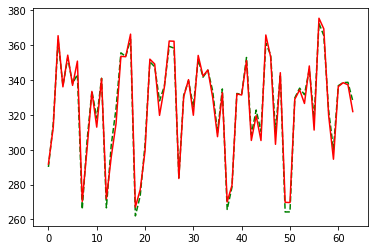

In [ ]:
plt.plot(y_test, 'g--')
plt.plot(dnn.predict(X_test), 'r')

**2022 - 3 - 17**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
np.unique(df['target'])

array([0, 1, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
iris_s = ss.fit_transform(iris.data)
iris_s

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
input=iris_s
output=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel="linear", C=1) #poly, rbf

In [ ]:
svc.fit(train_input,train_output)

SVC(C=1, kernel='linear')

In [ ]:
svc.score(test_input,test_output)

0.9736842105263158

In [ ]:
svc.predict(test_input)

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0])

In [ ]:
test_output

114    2
15     0
41     0
120    2
133    2
57     1
144    2
75     1
107    2
31     0
137    2
25     0
138    2
111    2
106    2
117    2
90     1
73     1
102    2
141    2
92     1
62     1
4      0
123    2
16     0
129    2
108    2
143    2
78     1
35     0
28     0
48     0
149    2
43     0
76     1
136    2
68     1
10     0
Name: target, dtype: int64

In [8]:
!pip install pandas_datareader
!pip install yfinance

In [9]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [34]:
data = pdr.get_data_yahoo('FB', start="2021-03-03", end="2022-03-03")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-03,260.290009,260.989990,255.100006,255.410004,255.410004,15513500
2021-03-04,256.470001,266.489990,253.500000,257.640015,257.640015,31626500
2021-03-05,260.670013,265.450012,255.610001,264.279999,264.279999,26820100
2021-03-08,265.549988,265.579987,255.050003,255.309998,255.309998,18391800
2021-03-09,261.179993,268.529999,259.809998,265.739990,265.739990,22039700


In [35]:
open = np.array(data['Open'])
high = np.array(data['High'])
low = np.array(data['Low'])
close = np.array(data['Close'])
adj = np.array(data['Adj Close'])

In [36]:
X = np.column_stack((open, high, low, close))
y = adj

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [18]:
dnn = Sequential()
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [39]:
# RNN 돌릴때는 np.stack할 때 순서가 중요, 왜냐면 서로서로 영향을 주기때문에
rnn = Sequential()
rnn.add(SimpleRNN(200 ,input_shape=(4, 1))) # open, high, low, close, volume, 
rnn.add(Dense(150, activation='relu'))
rnn.add(Dense(200, activation='relu'))
rnn.add(Dense(150, activation='relu'))
rnn.add(Dense(1))
rnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [40]:
rnn.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
4/4 [==============================] - 2s 11ms/step - loss: 104339.4062 - mean_absolute_error: 320.4994
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 103274.2734 - mean_absolute_error: 318.8174
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 99756.4375 - mean_absolute_error: 313.1530
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 90670.6953 - mean_absolute_error: 297.9237
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 72075.2734 - mean_absolute_error: 264.1007
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 43584.8828 - mean_absolute_error: 201.0619
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 13519.3701 - mean_absolute_error: 104.0164
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 6016.9194 - mean_absolute_error: 62.5255
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 9787.2598 

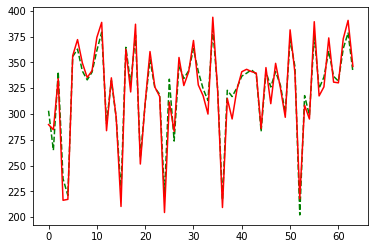

In [33]:
plt.plot(y_test, 'g--')
plt.plot(dnn.predict(X_test), 'r');

In [49]:
rnn.predict(X_test).T

array([[343.12888, 339.63925, 284.59882, 344.38342, 345.10132, 282.563  ,
        345.486  , 341.81702, 342.28644, 340.829  , 345.12775, 344.88885,
        341.31818, 342.921  , 345.55118, 283.20978, 272.0703 , 276.24384,
        342.13306, 282.7804 , 282.9325 , 340.56155, 344.85156, 344.60413,
        273.99588, 343.6326 , 343.00113, 284.9748 , 342.87918, 271.96988,
        343.69504, 344.03156, 340.839  , 340.80502, 339.5602 , 345.61594,
        344.0868 , 275.3802 , 284.21613, 285.7395 , 344.6107 , 343.4306 ,
        342.94476, 339.99374, 274.14264, 340.50638, 284.86963, 340.8203 ,
        342.8125 , 345.44806, 345.13596, 339.8364 , 345.319  , 277.76804,
        279.30597, 285.4099 , 341.2491 , 343.17398, 340.92834, 342.383  ,
        342.53455, 333.35327, 272.16623, 342.55798]], dtype=float32)

In [51]:
np.corrcoef(rnn.predict(X_test).T, np.array(y_test))

array([[1.        , 0.81694149],
       [0.81694149, 1.        ]])